# Getting started with Python / Interactive Python with Jupyter Lab

## Installing miniconda

- https://docs.conda.io/en/latest/miniconda.html
- https://youtu.be/YqUb9XALnDE?t=209

### Printing and Variable

In [12]:
print("Hello World")

Hello World


In [13]:
# comments are done like this

In [16]:
number = 10
string = "This is a string"

print(number)

10


In [17]:
print(string)

This is a string


In [18]:
print(f"number: {number}, and string: {string}")

number: 10, and string: This is a string


In [19]:
print(f"{type(number)} and {type(string)}")

<class 'int'> and <class 'str'>


### Functions

In [20]:
# Fibonacci sequence: 0, 1, 1, 2, 3, 5, 8...

def f(n: int) -> int:
    """
    Fibonacci sequence
    ---
    params
    n (int) number requested in sequence
    
    returns
    interger in fibonacci sequence
    """
    if n == 0:
        return 0
    if n == 1:
        return 1
    if n == 2:
        return 1
    if n >= 3:
        return f(n-1) + f(n-2)

In [21]:
?f

Signature: f(n: int) -> int
Docstring:
Fibonacci sequence
---
params
n (int) number requested in sequence

returns
interger in fibonacci sequence
File:      ~/JupyterlabProjects/Saxon/<ipython-input-20-d0995f361bf4>
Type:      function


### More data type - Lists

In [22]:
r = range(10)
r

range(0, 10)

In [24]:
lst = list(r)
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
lst[0]

0

In [26]:
lst[1:3]

[1, 2]

In [31]:
lst[-1]

9

In [28]:
lst[::-1]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [3]:
def f1(x: int) -> int:
    return x + 1

def f2(x: int) -> int:
    return x ** 2

def f3(x: int) -> float:
    return 1 / x

funcs = [f1, f2, f3]

for func in funcs:
    print(func(2))

3
4
0.5


In [29]:
for i in lst:
    output = f(i)
    print(output, end=", ")

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 

In [30]:
output = []
for i in lst:
    output.append(f(i))
output

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [11]:
[f(i) for i in rng]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

### Importing libraries

In [32]:
times = []
for i in range(33):
    t = %timeit -n1 -o f(i)
    times.append(t.best)

288 ns ± 246 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
302 ns ± 252 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
304 ns ± 204 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
623 ns ± 288 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
957 ns ± 326 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.39 µs ± 880 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.28 µs ± 424 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.56 µs ± 411 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.62 µs ± 447 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.05 µs ± 598 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
14.4 µs ± 623 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
23.9 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
36.9 µs ± 534 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)
61.1 µs ± 3.57 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
96.1 µs ± 506 ns per loop (mean ± std. dev. of 7 ru

In [34]:
import pandas as pd

df = pd.DataFrame(data=times, columns=["f"])
df.head()

,f
0,1.580001e-07
1,1.819999e-07
2,1.979997e-07
3,4.560002e-07
4,7.710000e-07


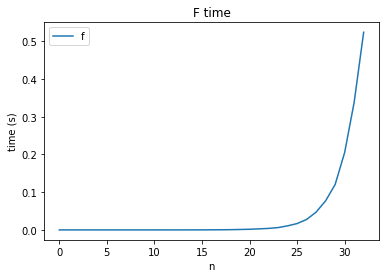

In [36]:
import matplotlib.pyplot as plt

g = df.plot(title="F time")
g.set_xlabel("n")
g.set_ylabel("time (s)")
plt.savefig("f.png")

In [15]:
df.sum()

f    3.693825
dtype: float64

### More data types - Dictionaries

In [68]:
dct = {
    "key1": "value1",
    "key2": ["value2", "value3"],
    "random name for a key": 1,
    "key4": (2000, 3000)
}

In [42]:
dct["key4"]

(2000, 3000)

In [45]:
#dct['key5'] will error

In [50]:
dct.get("key5") is None

True

In [70]:
for k,v in dct.items():
    print(f"key: {k}, value: {v}")

key: key1, value: value1
key: key2, value: ['value2', 'value3']
key: random name for a key, value: 1
key: key4, value: (2000, 3000)


In [91]:
cache = {}

def f_better(n: int) -> int:
    """
    Fibonacci sequence - !!with caching!!
    ---
    params
        n (int) number requested in sequence
    
    returns
        interger in fibonacci sequence
    """
    if all([cache.get(n-1), cache.get(n-2)]):
        return cache[n-1] + cache[n-2]   
    elif n == 0:
        return 0
    elif n == 1 or n == 2:
        return 1
    else:
        cache[n] = f_better(n-1) + f_better(n-2) 
        return cache[n]

In [92]:
times = []
for i in range(35):
    t = %timeit -n1 -o -q f_better(i)
    times.append(t.best)
    
df['f_better'] = pd.DataFrame(data=times)
df.head()

,f,f_better
0,1.580001e-07,0.000001
1,1.819999e-07,0.000001
2,1.979997e-07,0.000001
3,4.560002e-07,0.000003
4,7.710000e-07,0.000006


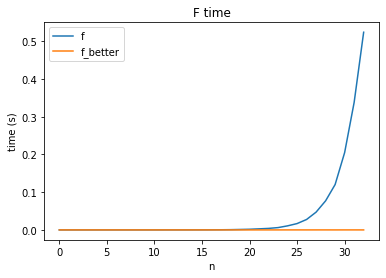

In [93]:
g = df.plot(title="F time")
g.set_xlabel("n")
g.set_ylabel("time (s)")
plt.savefig("f_better.png")

In [83]:
cache

{3: 2,
 4: 3,
 6: 8,
 7: 13,
 9: 34,
 10: 55,
 12: 144,
 13: 233,
 15: 610,
 16: 987,
 18: 2584,
 19: 4181,
 21: 10946,
 22: 17711,
 24: 46368,
 25: 75025,
 27: 196418,
 28: 317811,
 30: 832040,
 31: 1346269,
 33: 3524578,
 34: 5702887}

### Classes

In [133]:
class Car:
    """
    Class for cars that people drive
    ---
    params 
        make (str): make of the car
        model (str): model of the car
        year (int): year car was made
    """
    def __init__(self, make: str, model: str, year: int=2021):
        self.make = make
        self.model = model
        self.year = year
        self.__is_driving = False
        
    def __repr__(self):
        return f'{self.make} - {self.model}'
    
    def drive(self) -> str:
        if not self.__is_driving:
            print(f'{self.make} - {self.model} is now driving')
            self.__is_driving = True
        else:
            print(f'{self.make} - {self.model} is ALREADY driving!')
    
    def stop(self) -> str:
        if self.__is_driving:
            print(f'{self.make} - {self.model} has stopped')
            self.__is_driving = False
        else:
            print(f'{self.make} - {self.model} is ALREADY stopped!')

In [134]:
?Car

Init signature: Car(make: str, model: str, year: int = 2021)
Docstring:     
Class for cars that people drive
---
params 
    make (str): make of the car
    model (str): model of the car
    year (int): year car was made
Type:           type
Subclasses:     


In [135]:
shivan = Car('Toyota', 'Corolla', '2008')
bruno = Car('Tesla', 'Model3')

In [136]:
bruno

Tesla - Model3

In [137]:
shivan.drive()

Toyota - Corolla is now driving


In [138]:
shivan.drive()

Toyota - Corolla is ALREADY driving!


In [139]:
bruno.stop()

Tesla - Model3 is ALREADY stopped!
